该数据集来自南斯拉夫卢布尔雅那大学医疗中心肿瘤研究所，由M. Zwitter 与
M. Soklic 二者提供，感谢。该数据集可在UCI数据库中找到。该数据库是加州大学欧文分校提出的用于机器学习的数据库，是一个常用的标准测试数据集。该数据集有2大类，9个属性，共286个实例。

class：类别，分别是乳腺癌复发（recurrence-events）和未复发（no-recurrence-events）

age：年龄，有 20-29, 30-39, 40-49, 50-59, 60-69, 70-79，六个区间

menopause：绝经期，分为prememo（未绝经），ge40（40岁之后绝经），lt40（40岁之前绝经）

tumor-size：肿瘤大小

inv-nodes：淋巴结个数

node-caps：结节冒有无

deg-malig：肿瘤恶性程度，分为1、2、3三种，3恶性程度最高

breast： 分为left和right

breast-quad：所在象限

irradiat：是否有放射性治疗经历
 
原文链接：https://blog.csdn.net/weixin_44615820/article/details/88693275

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['font.sans-serif'] = ['simhei']
mpl.rcParams['font.serif'] = ['simhei']
plt.rc("font",family="SimHei",size="14") 
sns.set_style("darkgrid")

cancer=pd.read_csv("../data/cancer.csv")
cancer.columns=['class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
cancer.head(5)
#cancer.info()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [14]:
#数据预处理
cancer.loc[cancer["class"]=="no-recurrence-events","class"]=1
cancer.loc[cancer["class"]=="recurrence-events","class"]=0

cancer.loc[cancer["menopause"]=="premeno","menopause"]=0
cancer.loc[cancer["menopause"]=="lt40","menopause"]=1
cancer.loc[cancer["menopause"]=="ge40","menopause"]=2

cancer.loc[cancer["node-caps"]=="no","node-caps"]=0
cancer.loc[cancer["node-caps"]=="yes","node-caps"]=1
cancer.loc[cancer["node-caps"]=="?","node-caps"]=1
#node-caps结节冒未知就当做有

cancer.loc[cancer["irradiat"]=="no","irradiat"]=1
cancer.loc[cancer["irradiat"]=="yes","irradiat"]=0

cancer=cancer.drop(['breast'],axis=1)
cancer.head(10)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast-quad,irradiat
0,1,40-49,0,20-24,0-2,0,2,right_up,1
1,1,40-49,0,20-24,0-2,0,2,left_low,1
2,1,60-69,2,15-19,0-2,0,2,left_up,1
3,1,40-49,0,0-4,0-2,0,2,right_low,1
4,1,60-69,2,15-19,0-2,0,2,left_low,1
5,1,50-59,0,25-29,0-2,0,2,left_low,1
6,1,60-69,2,20-24,0-2,0,1,left_low,1
7,1,40-49,0,50-54,0-2,0,2,left_low,1
8,1,40-49,0,20-24,0-2,0,2,left_up,1
9,1,40-49,0,0-4,0-2,0,3,central,1


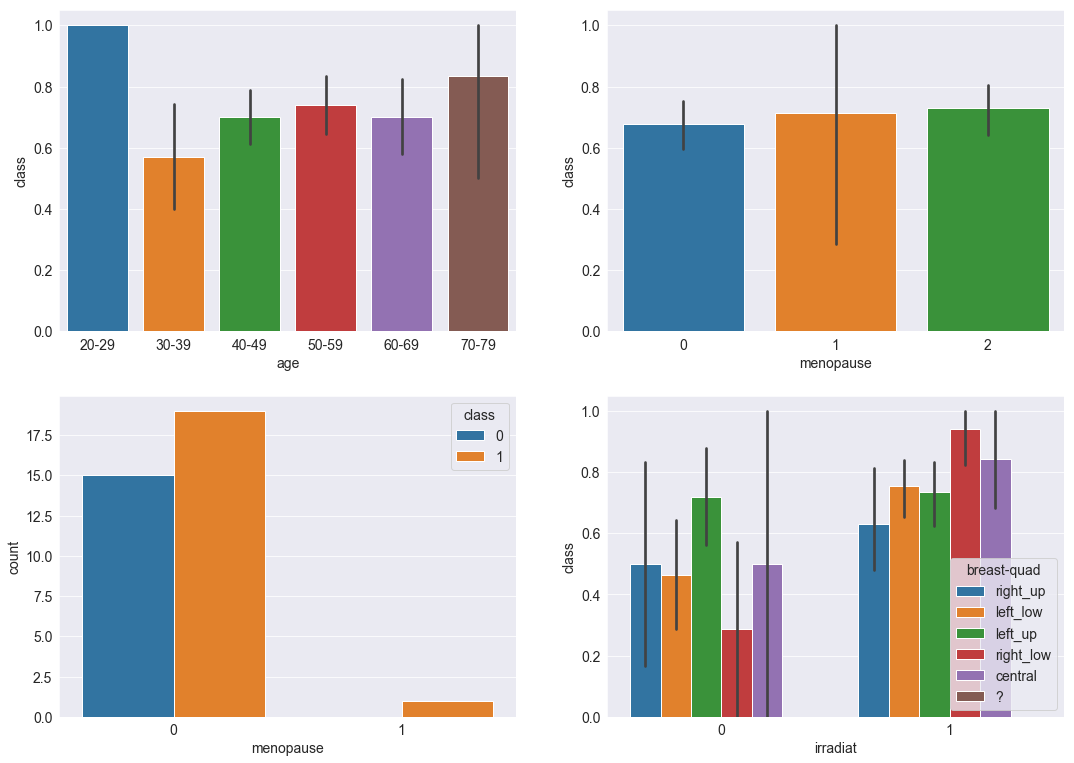

In [15]:
fig,axes = plt.subplots(2,2,figsize=(18,13))
sns.barplot(x='age',y='class',data=cancer,ax=axes[0,0],order=["20-29","30-39","40-49","50-59","60-69","70-79"])
sns.barplot(x='menopause',y='class',data=cancer,ax=axes[0,1])
sns.countplot(x='menopause',hue='class',data=cancer[cancer.age.isin(['30-39'])],ax=axes[1,0])
sns.barplot(x='irradiat',y='class',hue='breast-quad',data=cancer,ax=axes[1,1])

左上图1可以看出，乳腺癌复发的概率和年龄关系不大，但在30-39这个年龄段，可能因为绝经的原因（猜测）,而导致复发率相比较高，故做图3，发现30-39基本为未绝经患者。
同时图2表明，绝经时期对复发率有一定影响，但影响不大。
图4表明，经过放疗会较大程度地增加复发的概率。
当然这些只是猜测，具体还需模型验证。

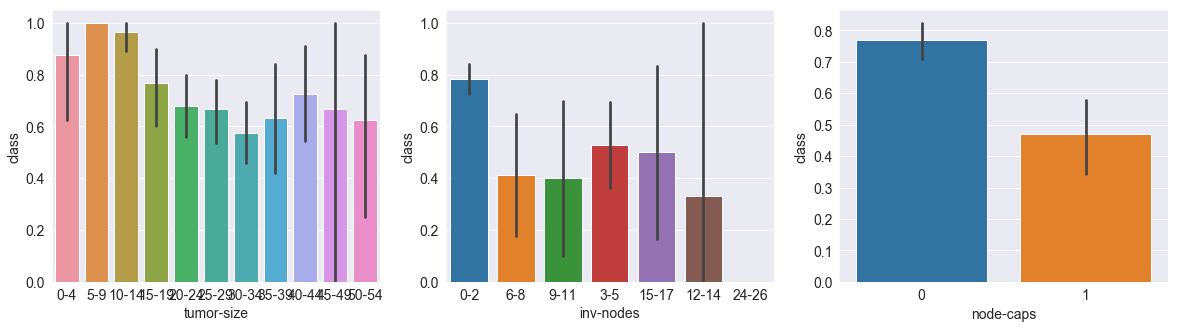

In [16]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))

sns.barplot(x='tumor-size',y='class',data=cancer,order=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'],ax=ax1)
sns.barplot(x='inv-nodes',y='class',data=cancer,ax=ax2)
sns.barplot(x='node-caps',y='class',data=cancer,ax=ax3)

上面三个可知，肿块大小，淋巴个数多少，结节冒有无，都影响着复发率

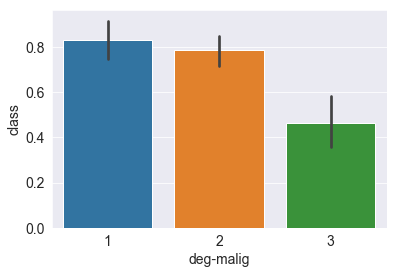

In [17]:
sns.barplot(x='deg-malig',y='class',data=cancer)

恶化程度越深，复发率越高。经过可视化可以对这些特征有个初步认识，如放疗、结节冒、恶化程度等对乳腺癌复发影响程度较大
接下来对数据进行标签化

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

features = ['age','tumor-size','inv-nodes','breast-quad']
#print("encoding....")
for feature in features:  
    #非数字型和数字型标签值标准化
    le.fit(cancer[feature])
    cancer[feature] = le.transform(cancer[feature])
#print("over....")
cancer.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast-quad,irradiat
0,1,2,0,3,0,0,2,5,1
1,1,2,0,3,0,0,2,2,1
2,1,4,2,2,0,0,2,3,1
3,1,2,0,0,0,0,2,4,1
4,1,4,2,2,0,0,2,2,1


In [19]:
from sklearn.model_selection import train_test_split

predictors=cancer.columns[1:]
X_train,X_test,y_train,y_test=train_test_split(cancer[predictors],cancer['class'],test_size=0.2,random_state=1)

In [20]:
###下为决策树代码
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

max_depth=range(4,10,1) 
min_samples_split=range(2,12,1) 
min_samples_leaf=range(2,12,1) 
parameters_dtc={'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

grid_search=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameters_dtc,cv=10,n_jobs=-1) 
grid_search.fit(X_train,y_train) 
grid_search.best_params_

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2}

In [22]:
import pydotplus
from sklearn.tree import export_graphviz

#根据调参结果构建决策树 
dtc=DecisionTreeClassifier(max_depth=5,min_samples_split=2,min_samples_leaf=9) 
dtc.fit(X_train,y_train) 
y_predict=dtc.predict(X_test) 

print("决策树模型在测试集上的准确率为：",metrics.accuracy_score(y_test,y_predict))

###保存图像到pdf文件
dot_data = export_graphviz(dtc,out_file=None,feature_names=predictors,class_names="class",filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("../out/cancer_tree.pdf")

决策树模型在测试集上的准确率为： 0.8070175438596491


True

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

#选择分类器的类型
RF = RandomForestClassifier()

#可以通过定义树的各种参数，限制树的大小，防止出现过拟合现象
parameters = {'n_estimators': [50,100,200], 
              'criterion': ['entropy', 'gini'],        
              'max_depth': [4,5,6], 
              'min_samples_split': [2,4,6,8],
              'min_samples_leaf': [2,4,6,8,10]
             }

#自动调参，通过交叉验证确定最优参数。
grid_obj = GridSearchCV(RF,parameters,cv=10,n_jobs=1)
grid_obj = grid_obj.fit(X_train,y_train)

clf = grid_obj.best_estimator_
clf.fit(X_train,y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
predictions = clf.predict(X_test)
print("随机森林模型在测试集上的准确率为：",accuracy_score(y_test,predictions))

随机森林模型在测试集上的准确率为： 0.8245614035087719


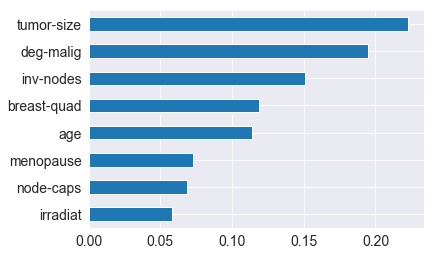

In [25]:
#影响乘客是否幸存的重要因素
importance=clf.feature_importances_
series=pd.Series(importance,index=X_train.columns)
series.sort_values(ascending=True).plot('barh')
plt.show()

In [26]:
#支持向量机
from sklearn.svm import SVC

svr=SVC()
parameters_SVM={'kernel':['rbf','linear'],'C':range(4,5,6),'gamma':[0.1,0.5,1]}

grid_SVM=GridSearchCV(svr,parameters_SVM,cv=10)
grid_SVM.fit(X_train,y_train)
clf_SVM=grid_SVM.best_estimator_
clf_SVM.fit(X_train,y_train)

print(clf_SVM)
print("支持向量机在训练集上的准确率为：",clf_SVM.score(X_train,y_train))
print("支持向量机在测试集上的准确率为：",clf_SVM.score(X_test,y_test))

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
支持向量机在训练集上的准确率为： 0.8596491228070176
支持向量机在测试集上的准确率为： 0.7543859649122807


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
